OBJE TESPİTİ

In [1]:
from mediapipe import solutions # El tespiti için görsel işleme görevleri
from mediapipe.framework.formats import landmark_pb2 #  'landmark_pb2' formatı cinsinden verileri almak için 
import numpy as np
import cv2
import matplotlib.pyplot as  plt
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import urllib.request

In [2]:
margin = 10 # Metnin üst köşesinden elin sınırına olan mesafe
font_size = 1 # Yazı tipi boyutu
font_thinckness = 1 # Yazı kalınlığı
handedness_text_color = (88,205,54) # RGB Formatında yeşil renk

In [4]:
url = "https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/hand_landmarker.task"
filename = "hand_landmarker.task"

urllib.request.urlretrieve(url, filename)

('hand_landmarker.task', <http.client.HTTPMessage at 0x2165062f700>)

In [5]:
base_options = python.BaseOptions(model_asset_path=filename)
options = vision.HandLandmarkerOptions(base_options=base_options,num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

In [ ]:
img = cv2.imread("data/el_ornek.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)

In [6]:
img = mp.Image.create_from_file("data/el_ornek.jpg")
detection_result = detector.detect(img)

In [12]:
def draw_landmarkers_on_image(rgb_image,detection_result):
    hand_landmarks_list = detection_result.hand_landmarks # Tespit edilen elin işaretlendirmelerini içerir.
    handedness_list = detection_result.handedness # Tespit edilen elin sağ ve sol olma durumu.
    annotated_image = np.copy(rgb_image) # Girdi görüntüsü kopyalanır.
    
    # Tespit edilen elleri işaretlemek için döngü oluşturulur.
    
    for idx in range(len(hand_landmarks_list)):
        hand_landmarks = hand_landmarks_list[idx] # Indexi alarak el işaretlerini alır.
        handedness = handedness_list[idx] # Indexi kullanarak hangi elin tespit edildiğini anlar.
        
        hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList() # 'landmark_pb2' Formatında bir liste oluşturur.
        hand_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x,y=landmark.y,z=landmark.z) for landmark in hand_landmarks
        ])
        
        solutions.drawing_utils.draw_landmarks( # El işaretleri görüntü üzerine çizilir.
            
            annotated_image,
            hand_landmarks_proto,
            solutions.hands.HAND_CONNECTIONS,
            solutions.drawing_styles.get_default_hand_landmarks_style(),
            solutions.drawing_styles.get_default_hand_connections_style()
            
        )
        
        height,width,_ = annotated_image.shape
        x_coordinates = [landmark.x for landmark in hand_landmarks]
        y_coordinates = [landmark.y for landmark in hand_landmarks]
        
        text_x = int(min(x_coordinates) * width)
        text_y = int(min(y_coordinates) * height) - margin
        
        cv2.putText(annotated_image,f"{handedness[0].category_name}",(text_x,text_y),cv2.FONT_HERSHEY_DUPLEX,font_size,handedness_text_color,font_thinckness,cv2.LINE_AA)
    return annotated_image

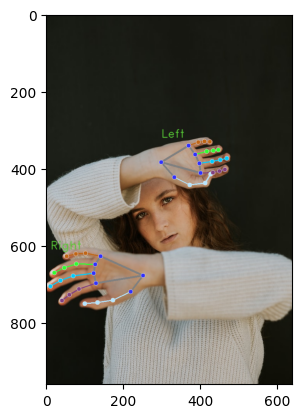

In [13]:
annoted_image = draw_landmarkers_on_image(img.numpy_view(),detection_result)
plt.figure()
plt.imshow(annoted_image)